In [66]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.animator import *
import matplotlib.pyplot as plt


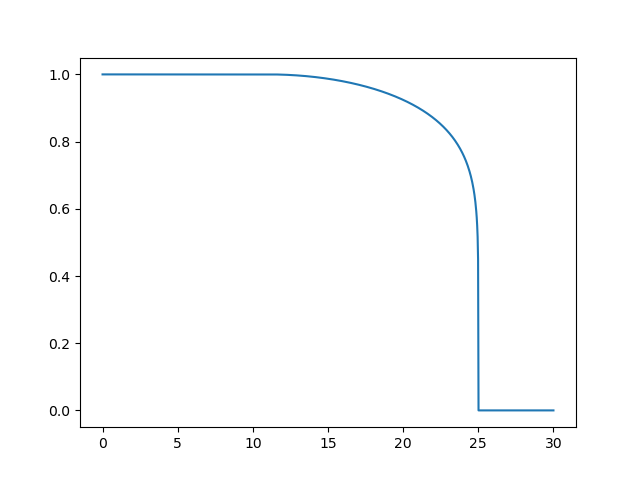

In [67]:
x_min = -25
x_max = 25
nx = 512

def potential(x, y, ell=0.111803):
    return 0.5*(x**2 + y**2) + ell*(x**2*y - y**3/3)

def initial_condition(x, y):
    # normalized gaussian
    return np.exp(-0.5*((x-2)**2 + (y-2)**2)) / np.pi**.5

def mask(x,y):
    r0 = 11
    r1 = 25
    # interpolate between r0 and r1 using a cosine function
    r = np.sqrt(x**2 + y**2)
    mask = np.zeros_like(r)
    
    mask = (r > r0) * (r < r1) * np.cos((r-r0)/(r1-r0)*np.pi/2)
    mask[r < r0] = 1
    mask **= 0.125
    
    #for i in range(len(r)):
    #    if r0 <= r[i] <= r1:
    #        mask[i] = np.cos((r[i]-r0)/(r1-r0)*np.pi/2)**.125
    return mask

plt.figure()
rr =  np.linspace(0, 30, 1000)
plt.plot(rr, mask(rr,0))
plt.show()



In [68]:
sim = Simulator(verbose=True)
sim.set_dimension(2)
sim.set_mass(1.0)
sim.set_potential(potential)
sim.set_initial_condition(initial_condition)
sim.set_grid([x_min, x_min], [x_max, x_max], [nx, nx])

ic| simulator.py:283 in set_propagator() at 14:36:41.417
ic| message: 'Propagation method set to "strang-3"'
ic| message: 'Dimension set to 2'
ic| message: 'Initial condition set.'
ic| self.initial_psi_fun: <function initial_condition at 0x16c874820>
ic| message: 'Grid set.'
ic| self.a: array([-25., -25.])
    self.b: array([25., 25.])
    self.n: array([512, 512])


In [75]:
sim.set_time_parameters(0.0, 100.0, 2000)

ic| 'Time parameters set.'
ic| self.t0: 0.0, self.t1: 100.0, self.n_steps: 2000


In [76]:
sim.prepare()

ic| 'Using given initial condition function. '


In [77]:
V = sim.ham.V
psi0 = sim.wf.psi.copy()


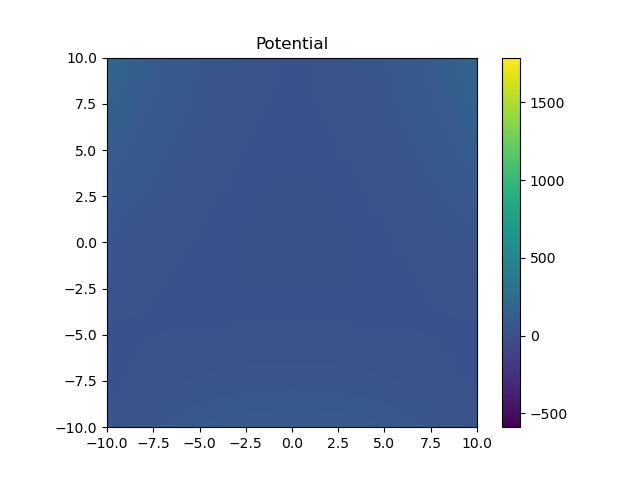

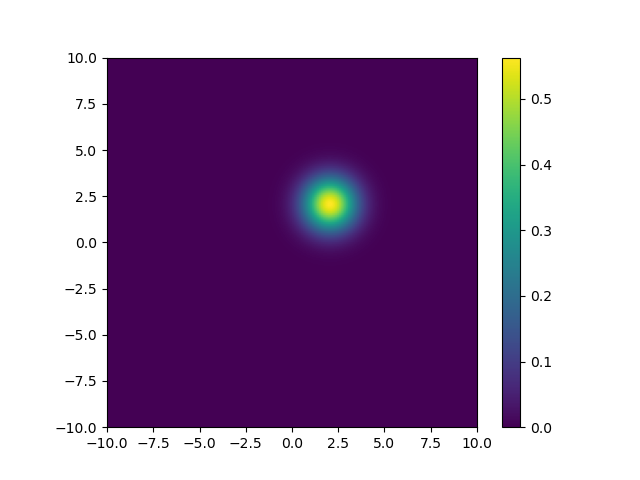

In [78]:
plt.figure()
plt.imshow(V.T, extent = [x_min, x_max, x_min, x_max], origin='lower')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.colorbar()
plt.title('Potential')
plt.show()

plt.figure()
plt.imshow(psi0.real.T, extent = [x_min, x_max, x_min, x_max], origin='lower')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.colorbar()
plt.show()

In [79]:
sim.prepare()

anim1 = Animator2d(sim, name = 'henon_heiles')
anim1.vis_type = 'complex'
anim1.show_axis = False
anim1.xlim = [-40, 40]
anim1.ylim = [-40, 40]
anim1.mag_map = lambda r: r**1
anim1.set_interval(10)
anim1.set_framesize(1024, 1024)

# initialize figure, and add potential visualization
anim1.init_figure()


anim_callback1 = anim1.get_callback()
anim1.caption_format = 't = {sim.t:.02f}'
#P_hist = np.zeros_like(sim.t_grid)
acorr = np.zeros_like(sim.t_grid, dtype=complex)
def callback(sim):
    if sim.t_index % 10 == 0:
        sim.psi = sim.psi * mask(sim.x, sim.y)
    acorr[sim.t_index] = np.sum(sim.psi * np.conj(psi0)) * sim.grid.dtau
    
    #psi_out = np.where((np.abs(sim.x) > 40) | (np.abs(sim.y) > 40), sim.psi, np.zeros_like(sim.psi))
#    P_hist[sim.t_index] = np.sum(np.abs(psi_out)**2) * sim.grid.dtau
#    sim.P_ionized = P_hist[sim.t_index]
    anim_callback1(sim)
    
    
sim.simulate(callback=callback)
anim1.make_movie("henon_heiles.mp4")
anim1.clean_frames()


ic| 'Using given initial condition function. '
ic| self.name: 'henon_heiles'
ic| self.folder: './henon_heiles_frames/'
ic| self.fig_width_pixels: 800
    self.fig_height_pixels: 600
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 80.0
ic| self.format: './henon_heiles_frames/frame%06d.png'
ic| self.fig_width_pixels: 1024
    self.fig_height_pixels: 1024
    self.fig_width: 10
    self.fig_height: 10.0
    self.dpi: 102.4
ic| animator.py:670 in get_extent() at 14:40:45.688
ic| x_range.shape: (512,), y_range.shape: (512,)
ic| extent: [-25.0, 24.90234375, -25.0, 24.90234375]
ic| self.caption_font: None
ic| 'Running simulation...'


  0%|          | 0/2000 [00:00<?, ?it/s]

ic| len(self.frame_list): 201
ic| 'making movie ...'
ic| filename: 'henon_heiles.mp4'
ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-

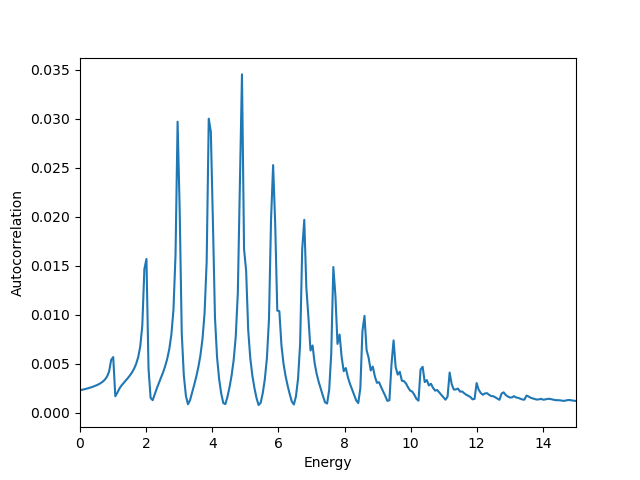

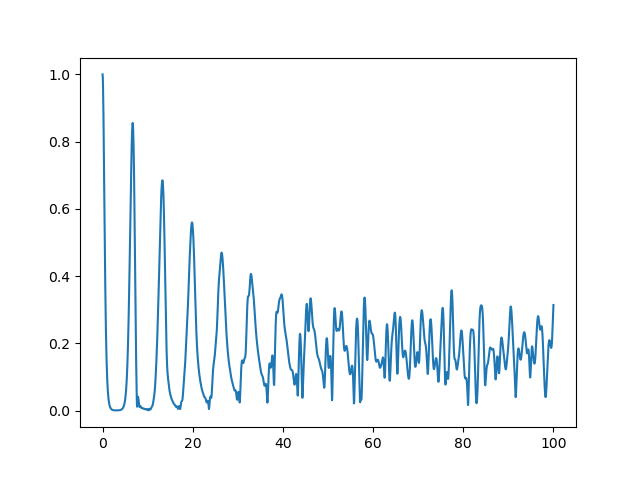

In [80]:
%matplotlib widget
plt.close('all')
plt.figure()
fourier_acorr = np.fft.fftshift(np.fft.ifft(acorr * np.exp(-sim.t_grid/30)  ))
omega = np.fft.fftshift(np.fft.fftfreq(len(sim.t_grid), sim.dt)) * 2 * np.pi
plt.plot(omega, np.abs(fourier_acorr))
plt.xlim(0, 15)
plt.xlabel('Energy')
plt.ylabel('Autocorrelation')
plt.show()

# plot the autocorrelation
plt.figure()
plt.plot(sim.t_grid, np.abs(acorr))
plt.show()



In [ ]:
sim.ham.D

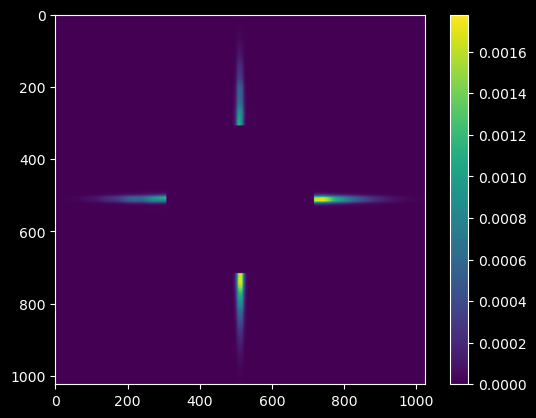

In [27]:
psi_out = np.where((np.abs(sim.x) > 40) | (np.abs(sim.y) > 40), sim.psi, np.zeros_like(sim.psi))
plt.figure()

plt.imshow(np.abs(psi_out))
plt.colorbar()

In [11]:
help(np.where)

Help on _ArrayFunctionDispatcher in module numpy:

where(...)
    where(condition, [x, y], /)
    
    Return elements chosen from `x` or `y` depending on `condition`.
    
    .. note::
        When only `condition` is provided, this function is a shorthand for
        ``np.asarray(condition).nonzero()``. Using `nonzero` directly should be
        preferred, as it behaves correctly for subclasses. The rest of this
        documentation covers only the case where all three arguments are
        provided.
    
    Parameters
    ----------
    condition : array_like, bool
        Where True, yield `x`, otherwise yield `y`.
    x, y : array_like
        Values from which to choose. `x`, `y` and `condition` need to be
        broadcastable to some shape.
    
    Returns
    -------
    out : ndarray
        An array with elements from `x` where `condition` is True, and elements
        from `y` elsewhere.
    
    See Also
    --------
    choose
    nonzero : The function that is called